# nba_dataset
[kaggle link](https://www.kaggle.com/datasets/wyattowalsh/basketball?resource=download)
"Daily Updated SQLite Database — 64,000+ Games, 4800+ Players, and 30 Teams 🏀"

This dataset provides a collection of sqlite and .csv files. For this work we will use only the **.csv**. The sqlite is updated in real time, but as discussed in the proposal we will focus season-wise so we will only need files from last season and earlier.

Description and usage of the files:
 - common_player_info - detailed info about all the players (team, height, name...)
 - ~~draft_combine_history - info of drafted players~~ <font color="red">**UNUSED**</font>
 - ~~draft_history - player drafted~~ <font color="red">**UNUSED**</font>
 - game - details and stats about everygame in the NBA 
 - ~~game_info - other info about games~~ <font color="red">**UNUSED**</font>
 - ~~game_summary - information about periods and broadcast~~ <font color="red">**UNUSED**</font>
 - ~~inactive_players - players retired~~ <font color="red">**UNUSED**</font>
 - line_score - points per game and others
 - ~~officials~~<font color="red">**UNUSED**</font>
 - other_stats - stats  per game of rebounds, turnovers...
 - play_by_play - description of a play in each game
 - player - simple description of players
 - team - simple list of league teams
 - ~~team_details - Details about the team's history and organization~~ <font color="red">**UNUSED**</font>
 - ~~team_history - year of foundation of all teams that were in the nba once~~ <font color="red">**UNUSED**</font>
 - team_info_common - stats of the team per year



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [2]:
def missing(df):
    missing_value_df = df.isnull().sum()
    print(missing_value_df)

    raw_percent_missing_value = 100*(missing_value_df / len(df.index))
    percent_missing_value = round(raw_percent_missing_value,2)
    print(percent_missing_value.sort_values(ascending=False))

    percent_missing_value.plot(kind='barh')
    plt.figure(figsize=(10,6))
    sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25)

## EDA

### Common player info

In [41]:
common_player_info = pd.read_csv('nba_dataset/csv/common_player_info.csv')
print(common_player_info.shape)
common_player_info.head(3)

(2457, 33)


,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09 00:00:00,Louisiana State,USA,...,mahmoud_abdul-rauf,1990.0,2000.0,N,Y,Y,1990,1,3,N
1,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,...,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
2,76007,John,Abramovic,John Abramovic,"Abramovic, John",J. Abramovic,john-abramovic,1919-02-09 00:00:00,Salem,USA,...,HISTADD_brooms_abramovic,1946.0,1947.0,N,Y,Y,Undrafted,Undrafted,Undrafted,N


Drop columns and inactive players at the time of the 1981 season; change the birthdate to datetime format

In [42]:
common_player_info.drop(common_player_info.columns[[4,5,6,8,10,13,16,17,21,23,26,27,28,32]], axis=1, inplace=True)

common_player_info = common_player_info[common_player_info['to_year']>1980]
common_player_info['birthdate'] = pd.to_datetime(common_player_info['birthdate'], dayfirst=True)
print(common_player_info.shape)
common_player_info.head(3)

(1752, 19)


,person_id,first_name,last_name,display_first_last,birthdate,country,height,weight,jersey,position,team_id,team_name,team_abbreviation,team_city,from_year,to_year,draft_year,draft_round,draft_number
0,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,1969-03-09,USA,6-1,162.0,1,Guard,1610612743,Nuggets,DEN,Denver,1990.0,2000.0,1990,1,3
1,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,1974-11-03,France,6-6,235.0,9,Forward-Guard,1610612758,Kings,SAC,Sacramento,1997.0,2003.0,1997,1,11
3,203112,Quincy,Acy,Quincy Acy,1990-10-06,USA,6-7,240.0,NaN,Forward,0,NaN,NaN,NaN,2012.0,2018.0,2012,2,37


Check for nan

person_id                     0
first_name                    0
last_name                     0
display_first_last            0
display_last_comma_first      0
birthdate                     0
country                       0
height                       38
weight                       38
jersey                      426
position                     20
team_id                       0
team_name                   413
team_abbreviation           413
team_city                   413
from_year                     0
to_year                       0
dtype: int64
jersey                      24.32
team_city                   23.57
team_abbreviation           23.57
team_name                   23.57
weight                       2.17
height                       2.17
position                     1.14
from_year                    0.00
team_id                      0.00
person_id                    0.00
first_name                   0.00
country                      0.00
birthdate                    0.00
d

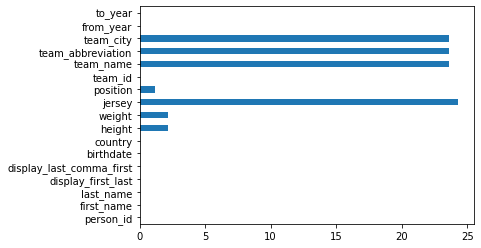

<Figure size 720x432 with 0 Axes>

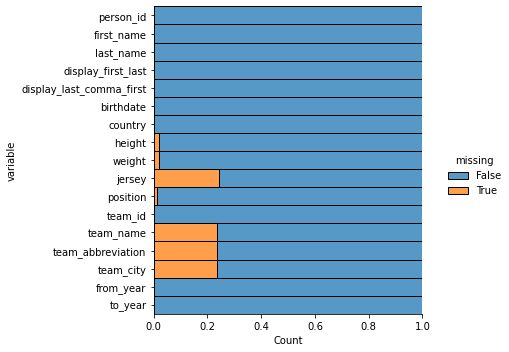

In [5]:
missing(common_player_info)

The missing values do not affect the general visualization of the data. The only part that will be problematic is the info about the players might be compromised, especially in older data. DONE

### Team

For this we will only drop the year_founded since it is irrelevant to the app. Notthin else will be changed as the data is complete. This table is usefull for the team id, as it matches in every other table of the dataset.

In [6]:
team = pd.read_csv("nba_dataset/csv/team.csv")
team.drop(['year_founded'], axis=1, inplace=True)
print(team.info())
team.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30 non-null     int64 
 1   full_name     30 non-null     object
 2   abbreviation  30 non-null     object
 3   nickname      30 non-null     object
 4   city          30 non-null     object
 5   state         30 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.5+ KB
None


,id,full_name,abbreviation,nickname,city,state
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio


### ~~team_info_common~~

In [7]:
team_info_common = pd.read_csv("nba_dataset/csv/team_info_common.csv")
print(team_info_common.info())
team_info_common.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_id            27 non-null     int64  
 1   season_year        27 non-null     object 
 2   team_city          27 non-null     object 
 3   team_name          27 non-null     object 
 4   team_abbreviation  27 non-null     object 
 5   team_conference    27 non-null     object 
 6   team_division      27 non-null     object 
 7   team_code          27 non-null     object 
 8   team_slug          27 non-null     object 
 9   w                  27 non-null     int64  
 10  l                  27 non-null     int64  
 11  pct                27 non-null     float64
 12  conf_rank          27 non-null     int64  
 13  div_rank           27 non-null     int64  
 14  min_year           27 non-null     int64  
 15  max_year           27 non-null     int64  
 16  league_id          27 non-nu

,team_id,season_year,team_city,team_name,team_abbreviation,team_conference,team_division,team_code,team_slug,w,...,league_id,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg
0,1610612737,2022-23,Atlanta,Hawks,ATL,East,Southeast,hawks,hawks,32,...,0,22022,7,117.0,12,43.7,20,24.6,21,116.9
1,1610612738,2022-23,Boston,Celtics,BOS,East,Atlantic,celtics,celtics,45,...,0,22022,4,117.7,6,45.2,7,26.3,9,112.4
2,1610612739,2022-23,Cleveland,Cavaliers,CLE,East,Central,cavaliers,cavaliers,40,...,0,22022,25,112.0,23,41.7,18,24.9,1,106.4


In [8]:
team_info_common.drop(team_info_common.columns[[4,7,8,14,15,16]], axis=1, inplace=True)
team_info_common.head(3)

,team_id,season_year,team_city,team_name,team_conference,team_division,w,l,pct,conf_rank,div_rank,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg
0,1610612737,2022-23,Atlanta,Hawks,East,Southeast,32,32,0.500,8,2,22022,7,117.0,12,43.7,20,24.6,21,116.9
1,1610612738,2022-23,Boston,Celtics,East,Atlantic,45,20,0.692,2,1,22022,4,117.7,6,45.2,7,26.3,9,112.4
2,1610612739,2022-23,Cleveland,Cavaliers,East,Central,40,26,0.606,4,2,22022,25,112.0,23,41.7,18,24.9,1,106.4


In [9]:
team_id1 = team['id']
team_id2 = team_info_common['team_id']

id = np.setdiff1d(team_id1, team_id2)

print('teams that are not in this table: {}'.format(team[team['id'].isin(id)]['full_name'].to_numpy()) )

teams that are not in this table: ['Toronto Raptors' 'Utah Jazz' 'Memphis Grizzlies']


Since this refers to the latest season and we want to focus on a full season, we will not use this table. Also, there are 3 teams missing on this table.

### Game

In [10]:
game = pd.read_csv("nba_dataset/csv/game.csv")
print(game.info())
game.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62339 entries, 0 to 62338
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               62339 non-null  int64  
 1   team_id_home            62339 non-null  int64  
 2   team_abbreviation_home  62339 non-null  object 
 3   team_name_home          62339 non-null  object 
 4   game_id                 62339 non-null  int64  
 5   game_date               62339 non-null  object 
 6   matchup_home            62339 non-null  object 
 7   wl_home                 62332 non-null  object 
 8   min                     62339 non-null  int64  
 9   fgm_home                62321 non-null  float64
 10  fga_home                44477 non-null  float64
 11  fg_pct_home             44438 non-null  float64
 12  fg3m_home               46686 non-null  float64
 13  fg3a_home               41422 non-null  float64
 14  fg3_pct_home            41063 non-null

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,2,0
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51,-5,0
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,-6,0


Drop columns and old games (change date to other format)

In [11]:
game.drop(game.columns[[2,3,28,30,31,53]], axis=1, inplace=True)


In [12]:
#game['game_date'].str.split('-')
#self.df["date"] = pd.to_datetime(self.df["date"]).dt.date

game['game_date'] = pd.to_datetime(game['game_date'], dayfirst=True)
mask = (game['game_date'] > '1981-07-01') & (game['game_date'] < '2022-07-01')

game = game.loc[mask]
game.shape

(43828, 48)

season_id             0
team_id_home          0
game_id               0
game_date             0
matchup_home          0
wl_home               1
min                   0
fgm_home              0
fga_home            768
fg_pct_home         769
fg3m_home             0
fg3a_home          3418
fg3_pct_home       3755
ftm_home              0
fta_home              0
ft_pct_home           1
oreb_home          3693
dreb_home          3751
reb_home            789
ast_home            797
stl_home           3610
blk_home           3401
tov_home           3430
pf_home              39
pts_home              0
plus_minus_home       0
team_id_away          0
matchup_away          0
wl_away               1
fgm_away              0
fga_away            768
fg_pct_away         769
fg3m_away             0
fg3a_away          3418
fg3_pct_away       3667
ftm_away              0
fta_away              0
ft_pct_away           1
oreb_away          3693
dreb_away          3750
reb_away            785
ast_away        

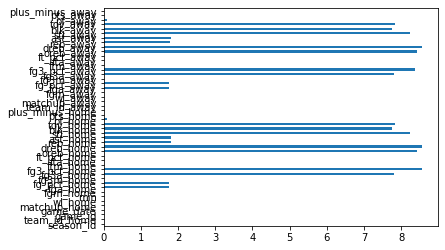

<Figure size 720x432 with 0 Axes>

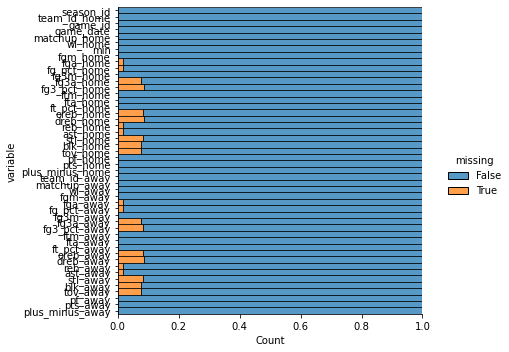

In [13]:
missing(game)

### other_stats

This data adds to some of the games registed in the games .csv file. This data is 3 times smaller than that dataframe.

In [14]:
other_stats = pd.read_csv("nba_dataset/csv/other_stats.csv")
other_stats.info()
other_stats.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27781 entries, 0 to 27780
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   league_id               27781 non-null  int64  
 1   team_id_home            27781 non-null  int64  
 2   team_abbreviation_home  27781 non-null  object 
 3   team_city_home          27781 non-null  object 
 4   pts_paint_home          27781 non-null  int64  
 5   pts_2nd_chance_home     27781 non-null  int64  
 6   pts_fb_home             27781 non-null  int64  
 7   largest_lead_home       27781 non-null  int64  
 8   lead_changes            27781 non-null  int64  
 9   times_tied              27781 non-null  int64  
 10  team_turnovers_home     27781 non-null  int64  
 11  total_turnovers_home    27687 non-null  float64
 12  team_rebounds_home      25881 non-null  float64
 13  pts_off_to_home         25601 non-null  float64
 14  team_id_away            27781 non-null

,league_id,team_id_home,team_abbreviation_home,team_city_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,...,team_abbreviation_away,team_city_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
0,0,1610612745,HOU,Houston,44,16,20,25,8,3,...,SAC,Sacramento,38,9,12,2,0,27.0,11.0,NaN
1,0,1610612748,MIA,Miami,32,15,14,16,0,0,...,ATL,Atlanta,32,9,6,0,1,24.0,7.0,NaN
2,0,1610612753,ORL,Orlando,38,25,3,18,4,6,...,WAS,Washington,48,9,20,5,0,16.0,13.0,NaN


In [16]:
other_stats.drop(other_stats.columns[[0,2,3,15,16]], axis=1, inplace=True)
other_stats.head(3)

,team_id_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,team_turnovers_home,total_turnovers_home,team_rebounds_home,pts_off_to_home,team_id_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
0,1610612745,44,16,20,25,8,3,2,23.0,14.0,NaN,1610612758,38,9,12,2,0,27.0,11.0,NaN
1,1610612748,32,15,14,16,0,0,1,19.0,6.0,NaN,1610612737,32,9,6,0,1,24.0,7.0,NaN
2,1610612753,38,25,3,18,4,6,1,17.0,8.0,NaN,1610612764,48,9,20,5,0,16.0,13.0,NaN


team_id_home               0
pts_paint_home             0
pts_2nd_chance_home        0
pts_fb_home                0
largest_lead_home          0
lead_changes               0
times_tied                 0
team_turnovers_home        0
total_turnovers_home      94
team_rebounds_home      1900
pts_off_to_home         2180
team_id_away               0
pts_paint_away             0
pts_2nd_chance_away        0
pts_fb_away                0
largest_lead_away          0
team_turnovers_away        0
total_turnovers_away      94
team_rebounds_away      1900
pts_off_to_away         2180
dtype: int64
pts_off_to_home         7.85
pts_off_to_away         7.85
team_rebounds_away      6.84
team_rebounds_home      6.84
total_turnovers_away    0.34
total_turnovers_home    0.34
pts_2nd_chance_home     0.00
pts_paint_away          0.00
team_turnovers_away     0.00
largest_lead_away       0.00
pts_fb_away             0.00
pts_2nd_chance_away     0.00
team_id_away            0.00
pts_fb_home             0.00
p

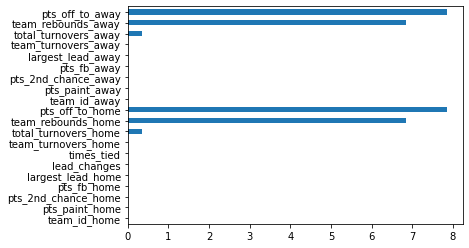

<Figure size 720x432 with 0 Axes>

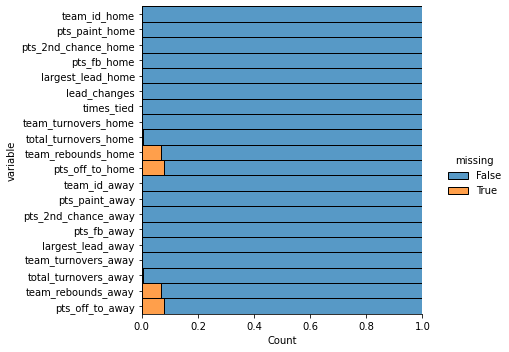

In [17]:
missing(other_stats)

### line_score

In [19]:
line_score = pd.read_csv("nba_dataset/csv/line_score.csv")
print(line_score.info())
line_score.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60768 entries, 0 to 60767
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_date_est           60768 non-null  object 
 1   game_sequence           31583 non-null  float64
 2   game_id                 60768 non-null  int64  
 3   team_id_home            60768 non-null  int64  
 4   team_abbreviation_home  60768 non-null  object 
 5   team_city_name_home     60768 non-null  object 
 6   team_nickname_home      60768 non-null  object 
 7   team_wins_losses_home   60768 non-null  object 
 8   pts_qtr1_home           59665 non-null  float64
 9   pts_qtr2_home           59654 non-null  float64
 10  pts_qtr3_home           59616 non-null  float64
 11  pts_qtr4_home           59615 non-null  float64
 12  pts_ot1_home            31340 non-null  float64
 13  pts_ot2_home            29997 non-null  float64
 14  pts_ot3_home            29799 non-null

,game_date_est,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,...,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
0,1946-11-01 00:00:00,NaN,24600001,1610610035,HUS,Toronto,Huskies,-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
1,1946-11-02 00:00:00,NaN,24600003,1610610034,BOM,St. Louis,Bombers,-,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
2,1946-11-02 00:00:00,NaN,24600002,1610612738,BOS,Boston,Celtics,-,10.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59


In [20]:
line_score['game_date_est'] = pd.to_datetime(line_score['game_date_est'], dayfirst=True)
mask = (line_score['game_date_est'] > '1981-07-01')
line_score = line_score.loc[mask]
line_score.shape

(43655, 43)

many lines seem to be missing values so we check that first

game_date_est                 0
game_sequence             12724
game_id                       0
team_id_home                  0
team_abbreviation_home        0
team_city_name_home           0
team_nickname_home            0
team_wins_losses_home         0
pts_qtr1_home                 0
pts_qtr2_home                 0
pts_qtr3_home                 0
pts_qtr4_home                 0
pts_ot1_home              13156
pts_ot2_home              13774
pts_ot3_home              13879
pts_ot4_home              13891
pts_ot5_home              32165
pts_ot6_home              32166
pts_ot7_home              32166
pts_ot8_home              32166
pts_ot9_home              32166
pts_ot10_home             32166
pts_home                      0
team_id_away                  0
team_abbreviation_away        0
team_city_name_away           0
team_nickname_away            0
team_wins_losses_away         0
pts_qtr1_away                 0
pts_qtr2_away                 0
pts_qtr3_away                 0
pts_qtr4

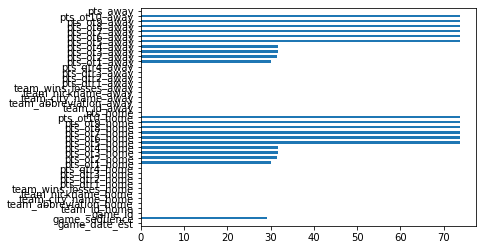

<Figure size 720x432 with 0 Axes>

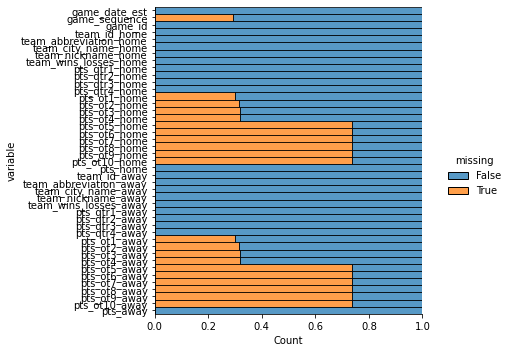

In [21]:
missing(line_score)

In [22]:
line_score['game_sequence'].unique()

array([nan,  1.,  3.,  2., 12.,  6.,  7., 10., 14.,  4., 11.,  5.,  8.,
        9., 13.,  0., 15.])

The ot columns are irrelevant for the visualization so they will be dropped ,so as the game_sequence

In [23]:
line_score.drop(line_score.columns[[1,4,5,6,12,13,14,15,16,17,18,19,20,21,
                                    24,25,26,32,33,34,35,36,37,38,39,40,41]], axis=1, inplace=True)
line_score.head(3)

,game_date_est,game_id,team_id_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,pts_qtr3_home,pts_qtr4_home,pts_home,team_id_away,team_wins_losses_away,pts_qtr1_away,pts_qtr2_away,pts_qtr3_away,pts_qtr4_away,pts_away
17113,1981-10-30,28100004,1610612758,-,22.0,20.0,25.0,35.0,102,1610612759,-,29.0,33.0,25.0,26.0,113
17114,1981-10-30,28100009,1610612743,-,36.0,40.0,27.0,31.0,134,1610612744,-,28.0,38.0,24.0,31.0,121
17115,1981-10-30,28100010,1610612754,-,18.0,17.0,28.0,33.0,96,1610612741,-,21.0,20.0,26.0,27.0,94


The team_wins_losses and team_wins_losses_away must be revised

### player

Simple player list, so will not be changed at all

In [24]:
player = pd.read_csv("nba_dataset/csv/player.csv")
player.head(3)

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0


### play_by_play

Every intervention in a game made by players. Useful to draw player stats per season and game

In [25]:
play_by_play = pd.read_csv("nba_dataset/csv/play_by_play.csv")
play_by_play.head(3)

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,...,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag
0,29600009,2,12,0,1,11:44 PM,12:00,NaN,Start of 1st Period (11:44 PM EST),NaN,...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
1,29600009,3,10,0,1,11:45 PM,12:00,Jump Ball Olajuwon vs. Polynice: Tip to Willia...,NaN,NaN,...,Kings,SAC,5.0,722,Corliss Williamson,1.610613e+09,Sacramento,Kings,SAC,0
2,29600009,4,5,4,1,11:46 PM,11:49,NaN,NaN,Williamson Traveling Turnover (P1.T1),...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0


In [26]:
print(play_by_play['eventmsgtype'].unique())
play_by_play.info()

[12 10  5  2  4  1  7  6  9  8  3 13 11 18]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13213866 entries, 0 to 13213865
Data columns (total 34 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   game_id                    int64  
 1   eventnum                   int64  
 2   eventmsgtype               int64  
 3   eventmsgactiontype         int64  
 4   period                     int64  
 5   wctimestring               object 
 6   pctimestring               object 
 7   homedescription            object 
 8   neutraldescription         object 
 9   visitordescription         object 
 10  score                      object 
 11  scoremargin                object 
 12  person1type                float64
 13  player1_id                 int64  
 14  player1_name               object 
 15  player1_team_id            float64
 16  player1_team_city          object 
 17  player1_team_nickname      object 
 18  player1_team_abbreviation  object 
 

In [27]:
play_by_play.drop(play_by_play.columns[[5,6,16,17,18,23,24,25,30,31,32,33]], axis=1, inplace=True)
play_by_play[play_by_play.columns[0:15]]

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,person2type
0,29600009,2,12,0,1,NaN,Start of 1st Period (11:44 PM EST),NaN,NaN,NaN,0.0,0,NaN,NaN,0.0
1,29600009,3,10,0,1,Jump Ball Olajuwon vs. Polynice: Tip to Willia...,NaN,NaN,NaN,NaN,4.0,165,Hakeem Olajuwon,1.610613e+09,5.0
2,29600009,4,5,4,1,NaN,NaN,Williamson Traveling Turnover (P1.T1),NaN,NaN,5.0,722,Corliss Williamson,1.610613e+09,0.0
3,29600009,5,2,1,1,MISS Olajuwon 13' Jump Shot,NaN,NaN,NaN,NaN,4.0,165,Hakeem Olajuwon,1.610613e+09,0.0
4,29600009,7,4,0,1,Drexler REBOUND (Off:1 Def:0),NaN,NaN,NaN,NaN,4.0,17,Clyde Drexler,1.610613e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13213861,22200991,608,3,11,4,Leonard Free Throw 1 of 2 (23 PTS),NaN,NaN,100 - 107,7,4.0,202695,Kawhi Leonard,1.610613e+09,0.0
13213862,22200991,609,3,12,4,Leonard Free Throw 2 of 2 (24 PTS),NaN,NaN,100 - 108,8,4.0,202695,Kawhi Leonard,1.610613e+09,0.0
13213863,22200991,610,2,1,4,NaN,NaN,MISS Siakam 27' 3PT Jump Shot,NaN,NaN,5.0,1627783,Pascal Siakam,1.610613e+09,0.0
13213864,22200991,611,4,0,4,Batum REBOUND (Off:1 Def:5),NaN,NaN,NaN,NaN,4.0,201587,Nicolas Batum,1.610613e+09,0.0


In [28]:
plays = play_by_play.copy()
plays = plays[plays['eventmsgtype'] != 7]
plays = plays[plays['eventmsgtype'] != 8]
plays = plays[plays['eventmsgtype'] != 9]
plays = plays[plays['eventmsgtype'] != 10]
plays = plays[plays['eventmsgtype'] != 11]
# plays = plays[plays['eventmsgtype'] != 12]
plays = plays[plays['eventmsgtype'] != 13]
plays.shape

(11434249, 22)

Check an event

In [97]:
plays.loc[plays['eventmsgtype'] == 6].sort_values(['eventmsgactiontype'], ascending=True, ignore_index=True)

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,homedescription,neutraldescription,visitordescription,score,scoremargin,...,person3type,player3_id,player3_name,player3_team_id,blocks_visitor,other_shot,layup_shot,dunk_shot,jump_shot,blocks_home
0,29600009,39,6,1,1,Grant P.FOUL (P1.T1),NaN,Grant P.FOUL (P1.T1),NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20701008,96,6,1,1,Pecherov P.FOUL (P1.PN),NaN,Pecherov P.FOUL (P1.PN),NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20701008,144,6,1,2,Dooling P.FOUL (P1.T1),NaN,NaN,NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20701008,168,6,1,2,Mason Jr. P.FOUL (P1.T2),NaN,Mason Jr. P.FOUL (P1.T2),NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20701008,179,6,1,2,Songaila P.FOUL (P2.T3),NaN,Songaila P.FOUL (P2.T3),NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269190,22200680,539,6,31,4,Garza Transition Take Foul (P3.T2) (D.Taylor),NaN,NaN,NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1269191,22200308,508,6,31,3,Nesmith Transition Take Foul (P2.T4) (M.Kallio),NaN,Nesmith Transition Take Foul (P2.T4) (M.Kallio),NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1269192,22200090,283,6,31,2,Mitchell Transition Take Foul (P2.T4) (E.Lewis),NaN,NaN,NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1269193,22200345,177,6,31,2,Langford Transition Take Foul (P2.T2) (C.Flores),NaN,NaN,NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
shot_types = []

for i in range(110):
    temp = shots.loc[shots['eventmsgactiontype'] == i]
    try:
        print(i, temp.iloc[0,5])
        shot_types.append(i)
    except:
        continue


0 No Shot
1 Abdul-Rauf 9' Jump Shot (2 PTS)
2 Elie 10' Running Jump Shot (2 PTS) (Olajuwon 1 AST)
3 Olajuwon 6' Hook Shot (2 PTS) (Maloney 1 AST)
4 Smith  Tip Shot (11 PTS)
5 Williamson  Layup (2 PTS) (Polynice 1 AST)
6 Maloney  Driving Layup (2 PTS) (Drexler 1 AST)
7 Willis  Dunk (4 PTS) (Bullard 1 AST)
8 Willis  Slam Dunk (8 PTS) (Mack 1 AST)
9 Williamson  Driving Dunk (8 PTS)
40 Johnson  Layup (6 PTS)
41 Terry Running Layup (4 PTS)
42 Harper  Driving Layup (2 PTS)
43 Jackson Alley Oop Layup (10 PTS) (Mottola 2 AST)
44 Funderburke  Reverse Layup (5 PTS) (Barry 1 AST)
45 Van Exel  Jump Shot (2 PTS)
46 Stoudamire 6' Running Jump Shot (2 PTS) (Davis 1 AST)
47 Duncan 11' Turnaround Jump Shot (2 PTS)
48 Garrett  Dunk (2 PTS) (Garnett 3 AST)
49 Bryant  Driving Dunk (5 PTS)
50 Duncan 1' Running Dunk (11 PTS) (Robinson 1 AST)
51 Garnett  Reverse Dunk (17 PTS) (Peeler 3 AST)
52 O'Neal  Alley Oop Dunk (26 PTS) (Harper 5 AST)
53 Willis Tip Shot (6 PTS)
54 Robinson 1' Running Tip Shot (21 PTS)
5

Types of events:
1. attempt scored
2. miss
3. free throw
4. rebound
5. turnover

Types of shots:
1. Jump Shot
2. Dunk
3. Layup
4. Others

In [55]:
jump_shot = [1,2,45,46,47,63,65,66,77,78,79,80,94,101,102,103,104,105]
dunk_shot = [7,8,9,48,49,50,51,52,64,87,88,89,90,91,92,106,107,108,109]
layup_shot = [5,6,40,41,42,43,44,71,72,73,74,75,76,97,98,99,100]
other_shot = []

for i in shot_types:
    if (i not in jump_shot) & (i not in dunk_shot) & (i not in layup_shot):
        other_shot.append(i)

In [95]:
# shots.loc[shots['eventmsgactiontype'].isin(dunk_shot)]
jump = shots['eventmsgactiontype'].isin(jump_shot).astype(int)
dunk = shots['eventmsgactiontype'].isin(dunk_shot).astype(int)
layup = shots['eventmsgactiontype'].isin(layup_shot).astype(int)
other = shots['eventmsgactiontype'].isin(other_shot).astype(int)

plays.insert(23, "jump_shot", jump)
plays.insert(23, "dunk_shot", dunk)
plays.insert(23, "layup_shot", layup)
plays.insert(23, "other_shot", other)

In [96]:
plays

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,homedescription,neutraldescription,visitordescription,score,scoremargin,...,person3type,player3_id,player3_name,player3_team_id,blocks_visitor,other_shot,layup_shot,dunk_shot,jump_shot,blocks_home
0,29600009,2,12,0,1,Start of 1st Period (11:44 PM EST),Start of 1st Period (11:44 PM EST),NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29600009,4,5,4,1,Williamson Traveling Turnover (P1.T1),NaN,Williamson Traveling Turnover (P1.T1),NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29600009,5,2,1,1,MISS Olajuwon 13' Jump Shot,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
4,29600009,7,4,0,1,Drexler REBOUND (Off:1 Def:0),NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,29600009,6,2,5,1,MISS Drexler Layup,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13213860,22200991,606,6,1,4,VanVleet P.FOUL (P4.PN) (T.Maddox),NaN,VanVleet P.FOUL (P4.PN) (T.Maddox),NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13213861,22200991,608,3,11,4,Leonard Free Throw 1 of 2 (23 PTS),NaN,NaN,100 - 107,7,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13213862,22200991,609,3,12,4,Leonard Free Throw 2 of 2 (24 PTS),NaN,NaN,100 - 108,8,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13213863,22200991,610,2,1,4,MISS Siakam 27' 3PT Jump Shot,NaN,MISS Siakam 27' 3PT Jump Shot,NaN,NaN,...,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0


The eventmsgactiontype lists a description of the taken in each event type. As this goes to the 110 values, it is very difficult to draw a data table with that level of description. With that said, we take out only the point maker (player 1) and the assister (player 2). We then find if the shot gives 1, 2 or 3 points in the scoreboard.

In [78]:

misses = plays[plays['eventmsgtype'] == 2]
blocks_home = misses['homedescription'].str.contains('BLOCK')
blocks_visitor = misses['visitordescription'].str.contains('BLOCK')

blocks_home = blocks_home.fillna(0)
blocks_home = blocks_home.astype(int)

blocks_visitor = blocks_visitor.fillna(0)
blocks_visitor = blocks_visitor.astype(int)

blocks_home

3           0
5           0
10          0
13          0
16          0
           ..
13213846    0
13213852    0
13213856    0
13213858    0
13213863    0
Name: homedescription, Length: 2624153, dtype: int32

In [84]:
plays['blocks_home']

0           NaN
2           NaN
3           0.0
4           NaN
5           0.0
           ... 
13213860    NaN
13213861    NaN
13213862    NaN
13213863    0.0
13213864    NaN
Name: blocks_home, Length: 11434249, dtype: float64

In [82]:
plays.insert(22, "blocks_home", blocks_home)
plays.insert(23, "blocks_visitor", blocks_visitor)

___________________________
# Creating useful tables

## teams

### season_stats

In [34]:
new = game.copy()
new.drop(new.columns[[2, 3, 6, 4, 27]], axis=1, inplace=True)
new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43828 entries, 17521 to 61348
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season_id        43828 non-null  int64  
 1   team_id_home     43828 non-null  int64  
 2   wl_home          43827 non-null  object 
 3   fgm_home         43828 non-null  float64
 4   fga_home         43060 non-null  float64
 5   fg_pct_home      43059 non-null  float64
 6   fg3m_home        43828 non-null  float64
 7   fg3a_home        40410 non-null  float64
 8   fg3_pct_home     40073 non-null  float64
 9   ftm_home         43828 non-null  float64
 10  fta_home         43828 non-null  float64
 11  ft_pct_home      43827 non-null  float64
 12  oreb_home        40135 non-null  float64
 13  dreb_home        40077 non-null  float64
 14  reb_home         43039 non-null  float64
 15  ast_home         43031 non-null  float64
 16  stl_home         40218 non-null  float64
 17  blk_home

In [35]:
col1 = new.iloc[:,:22]
col2 = new.iloc[:,22:]
col2.insert(0, 'season_id', col1['season_id'])

print(col1.shape, col2.shape)
season_games = np.concatenate((col1, col2), axis=0)

stats = ['season_id', 'team_id', 'wl', 'fgm', 'fga',
       'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm',
       'fta', 'ft_pct', 'oreb', 'dreb', 'reb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
       'plus_minus']

season_games = pd.DataFrame(data=season_games, columns=stats)
season_games = season_games.sort_values(['season_id', 'team_id'], ascending=(True, True), ignore_index=True)
season_games

(43828, 22) (43828, 22)


,season_id,team_id,wl,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus
0,21981,1610612737,L,40.0,82.0,0.488,0.0,0.0,NaN,26.0,...,NaN,NaN,41.0,11.0,NaN,4.0,15.0,29.0,106,-2
1,21981,1610612737,W,36.0,NaN,NaN,0.0,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,94,11
2,21981,1610612737,L,37.0,NaN,NaN,1.0,NaN,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,87,-8
3,21981,1610612737,L,43.0,NaN,NaN,1.0,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,104,-13
4,21981,1610612737,W,36.0,NaN,NaN,0.0,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,102,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87651,22021,1610612766,W,42.0,98.0,0.429,17.0,32.0,0.531,18.0,...,17.0,36.0,53.0,26.0,6.0,2.0,12.0,22.0,119,9
87652,22021,1610612766,W,49.0,90.0,0.544,12.0,35.0,0.343,15.0,...,8.0,32.0,40.0,39.0,7.0,3.0,12.0,21.0,125,11
87653,22021,1610612766,L,42.0,87.0,0.483,11.0,30.0,0.367,19.0,...,7.0,25.0,32.0,34.0,14.0,1.0,17.0,18.0,114,-30
87654,22021,1610612766,L,45.0,85.0,0.529,12.0,38.0,0.316,13.0,...,7.0,24.0,31.0,34.0,8.0,3.0,15.0,18.0,115,-29


In [36]:
season_nan = season_games[season_games.isnull().any(axis=1)]
season_nan

,season_id,team_id,wl,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus
0,21981,1610612737,L,40.0,82.0,0.488,0.0,0.0,NaN,26.0,...,NaN,NaN,41.0,11.0,NaN,4.0,15.0,29.0,106,-2
1,21981,1610612737,W,36.0,NaN,NaN,0.0,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,94,11
2,21981,1610612737,L,37.0,NaN,NaN,1.0,NaN,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,87,-8
3,21981,1610612737,L,43.0,NaN,NaN,1.0,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,104,-13
4,21981,1610612737,W,36.0,NaN,NaN,0.0,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,102,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23374,21993,1610612754,W,39.0,84.0,0.464,0.0,0.0,NaN,22.0,...,19.0,36.0,55.0,26.0,5.0,5.0,15.0,33.0,100,6
23556,21993,1610612756,W,41.0,81.0,0.506,0.0,0.0,NaN,29.0,...,15.0,32.0,47.0,27.0,9.0,10.0,17.0,25.0,111,5
32661,21997,1610612755,W,34.0,80.0,0.425,0.0,0.0,NaN,19.0,...,16.0,28.0,44.0,22.0,12.0,7.0,14.0,17.0,87,7
66280,22012,1610612738,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [37]:
#season_games.drop(season_nan.index[-2:])
season_games = season_games.drop(index=[66280,67633])

Generate the new table

In [38]:
season_stats = season_games.groupby(['season_id', 'team_id']).mean()
season_stats

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_22624\948880572.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  season_stats = season_games.groupby(['season_id', 'team_id']).mean()


fgm        fga    fg_pct       fg3m       fg3a  \
season_id team_id                                                            
21981     1610612737  39.146341  82.550000  0.494350   0.341463   1.375000   
          1610612738  44.597561  90.250000  0.482800   0.597561   1.777778   
          1610612739  41.524390  92.142857  0.449143   0.304878   0.875000   
          1610612741  41.085366  82.840000  0.488920   0.658537   2.600000   
          1610612742  41.341463  81.833333  0.502000   0.670732   2.600000   
...                         ...        ...       ...        ...        ...   
22021     1610612762  40.573171  86.182927  0.471561  14.536585  40.341463   
          1610612763  43.548780  94.378049  0.462183  11.524390  32.670732   
          1610612764  40.573171  86.048780  0.472195  10.487805  30.634146   
          1610612765  38.158537  88.621951  0.431390  11.280488  34.609756   
          1610612766  42.780488  91.426829  0.469939  13.939024  38.170732   

                       fg3_pct        ftm        fta    ft_pct       oreb  \
season_id team_id                                                           
21981     1610612737  0.472167  22.353659  29.109756  0.770720  12.000000   
          1610612738  0.300000  22.158537  29.963415  0.739976        NaN   
          1610612739  0.300000  19.853659  26.670732  0.744427  19.000000   
          1610612741  0.247938  23.792683  31.060976  0.764354  15.750000   
          1610612742  0.466400  21.219512  28.780488  0.736402  11.000000   
...                        ...        ...        ...       ...        ...   
22021     1610612762  0.359866  17.926829  23.365854  0.770354  10.780488   
          1610612763  0.352671  16.987805  23.146341  0.738549  14.134146   
          1610612764  0.342939  16.987805  21.682927  0.780049   8.987805   
          1610612765  0.327183  17.231707  22.024390  0.781439  10.975610   
          1610612766  0.365207  15.829268  21.378049  0.742244  10.829268   

                           dreb        reb        ast        stl       blk  \
season_id team_id                                                            
21981     1610612737        NaN  42.200000  22.578947  10.333333  6.307692   
          1610612738        NaN  46.238095  24.666667  11.000000  7.500000   
          1610612739        NaN  43.238095  20.523810   9.666667  3.000000   
          1610612741  25.666667  45.120000  23.920000   6.133333  6.200000   
          1610612742  19.000000  38.714286  26.142857   5.666667  3.800000   
...                         ...        ...        ...        ...       ...   
22021     1610612762  35.560976  46.341463  22.390244   7.170732  4.902439   
          1610612763  35.036585  49.170732  25.987805   9.756098  6.500000   
          1610612764  34.121951  43.109756  25.024390   6.365854  4.951220   
          1610612765  32.012195  42.987805  23.463415   7.682927  4.792683   
          1610612766  33.743902  44.573171  28.073171   8.621951  4.902439   

                            tov         pf         pts  plus_minus  
season_id team_id                                                   
21981     1610612737  17.500000  27.617284  100.987805    0.536585  
          1610612738  16.500000  24.597561  111.951220    6.378049  
          1610612739  13.875000  26.085366  103.207317   -8.512195  
          1610612741  19.789474  24.500000  106.621951   -2.024390  
          1610612742  16.000000  26.756098  104.573171   -4.426829  
...                         ...        ...         ...         ...  
22021     1610612762  14.000000  18.865854  113.609756    6.036585  
          1610612763  13.195122  19.756098  115.609756    5.682927  
          1610612764  13.134146  18.841463  108.621951   -3.378049  
          1610612765  14.182927  21.939024  104.829268   -7.719512  
          1610612766  13.256098  19.865854  115.329268    0.439024  

[1094 rows x 19 columns]

In [39]:
season_stats.reset_index()

,season_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,...,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus
0,21981,1610612737,39.146341,82.550000,0.494350,0.341463,1.375000,0.472167,22.353659,29.109756,...,12.000000,NaN,42.200000,22.578947,10.333333,6.307692,17.500000,27.617284,100.987805,0.536585
1,21981,1610612738,44.597561,90.250000,0.482800,0.597561,1.777778,0.300000,22.158537,29.963415,...,NaN,NaN,46.238095,24.666667,11.000000,7.500000,16.500000,24.597561,111.951220,6.378049
2,21981,1610612739,41.524390,92.142857,0.449143,0.304878,0.875000,0.300000,19.853659,26.670732,...,19.000000,NaN,43.238095,20.523810,9.666667,3.000000,13.875000,26.085366,103.207317,-8.512195
3,21981,1610612741,41.085366,82.840000,0.488920,0.658537,2.600000,0.247938,23.792683,31.060976,...,15.750000,25.666667,45.120000,23.920000,6.133333,6.200000,19.789474,24.500000,106.621951,-2.024390
4,21981,1610612742,41.341463,81.833333,0.502000,0.670732,2.600000,0.466400,21.219512,28.780488,...,11.000000,19.000000,38.714286,26.142857,5.666667,3.800000,16.000000,26.756098,104.573171,-4.426829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,22021,1610612762,40.573171,86.182927,0.471561,14.536585,40.341463,0.359866,17.926829,23.365854,...,10.780488,35.560976,46.341463,22.390244,7.170732,4.902439,14.000000,18.865854,113.609756,6.036585
1090,22021,1610612763,43.548780,94.378049,0.462183,11.524390,32.670732,0.352671,16.987805,23.146341,...,14.134146,35.036585,49.170732,25.987805,9.756098,6.500000,13.195122,19.756098,115.609756,5.682927
1091,22021,1610612764,40.573171,86.048780,0.472195,10.487805,30.634146,0.342939,16.987805,21.682927,...,8.987805,34.121951,43.109756,25.024390,6.365854,4.951220,13.134146,18.841463,108.621951,-3.378049
1092,22021,1610612765,38.158537,88.621951,0.431390,11.280488,34.609756,0.327183,17.231707,22.024390,...,10.975610,32.012195,42.987805,23.463415,7.682927,4.792683,14.182927,21.939024,104.829268,-7.719512


__________________
# Save the tables

In [40]:
#pd.save_csv(common_player_info, 'Clean_datasets/player_info')